In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Задача 1
---

In [42]:
def L_p_vector_norm(v, p):
   return ((np.sum(np.abs(v)**p))**(1/p))

def L_p_matrix_norm(m, p):
    vs = np.random.uniform(-1, 1, (m.shape[0], 10000))
    vs = vs/L_p_vector_norm(vs, p)
    return np.max(L_p_vector_norm(np.dot(m, vs), p))

def condition_number(m, p):
    return L_p_matrix_norm(m,p) * L_p_matrix_norm(np.linalg.pinv(m),p)

In [43]:
L_p_vector_norm((1,1),2)

1.4142135623730951

In [47]:
L_p_matrix_norm(np.array(((15,0),(0,5))),2)

11.189148593147504

Задача 2
---

In [50]:
M = np.random.random((3, 3))
def get_L2(A):
    return (np.max(np.linalg.eigvals(A.T @ A)))**0.5
def get_frobenius_norm(M):
    u, s, vh = np.linalg.svd(M)
    return np.sum(s ** 2) ** 0.5

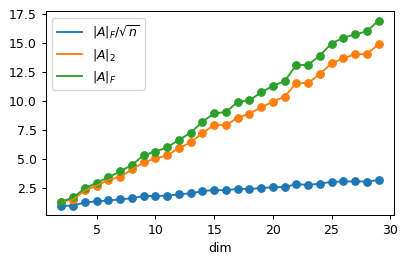

In [53]:
dim = 2
rep = 100
M = np.random.random((dim, dim))
vals = np.zeros(3)
for i in range(rep):
    vals += np.array([1/np.sqrt(dim) * get_frobenius_norm(M), get_L2(M), get_frobenius_norm(M)])/rep

for dim in range(3, 30):
    M = np.random.random((dim, dim))
    v = np.zeros(3)
    for i in range(rep):
        v += np.array([1/np.sqrt(dim) * get_frobenius_norm(M), get_L2(M), get_frobenius_norm(M)])/rep
    vals = np.vstack([vals, v])

x = [2] + list(range(3, 30))
y1 = vals[:, 0]
y2 = vals[:, 1]
y3 = vals[:, 2]

fig, ax = plt.subplots(dpi=90, figsize=(5, 3))

plt.plot(x, y1, label="$\|A\|_F/\\sqrt{n}$")
plt.scatter(x, y1)
plt.plot(x, y2, label="$\|A\|_2$")
plt.scatter(x, y2)
plt.plot(x, y3, label="$\|A\|_F$")
plt.scatter(x, y3)
plt.legend()
plt.xlabel("dim")
plt.show()

Задача 3
---

In [33]:
dim = 3
M = np.random.random((dim, dim))
A = M.T @ M
CH = np.linalg.cholesky(A)
np.random.normal(1, 2, dim)

dim = 3;
def get_fix_rand(A, N):
    CH = np.linalg.cholesky(A)
    z = np.random.normal(0, 1, (dim, N))
    return CH @ z

v1 = get_fix_rand(A,1000)[0]
v2 = get_fix_rand(A,1000)[1]
v3 = get_fix_rand(A,1000)[2]

print(A)

print(np.cov(v1, v2)[0][0])

print(np.cov(v1, v2)[1][1])

print(np.cov(v2, v3)[0][0])

print(np.cov(v2, v3)[1][1])

[[1.61092443 1.56960894 1.24816687]
 [1.56960894 1.57333213 1.24642831]
 [1.24816687 1.24642831 1.01144217]]
1.5847805720348258
1.6684115927357235
1.6684115927357235
0.9627167147401033


Задача 4

In [34]:
def procrust_transform(M1, M2):
    v1_bar = np.mean(M1, axis=0)
    v2_bar = np.mean(M2, axis=0)
    
    M1_tilde = M1 - v1_bar
    M2_tilde = M2 - v2_bar
    
    SVD_base = M1_tilde.T @ M2_tilde
    u, s, vh = np.linalg.svd(SVD_base)

    R = u @ vh
    mu = v2_bar - R.T @ v1_bar
    return R, mu

def plot_procrust_transform(M1, M2, flag=True):
    R, mu = procrust_transform(M1, M2)
    M1_im = M1@R+mu

    x2 = M2[:, 0]
    y2 = M2[:, 1]

    x1 = M1[:, 0]
    y1 = M1[:, 1]

    x1_im = M1_im[:, 0]
    y1_im = M1_im[:, 1]

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].scatter(x1, y1)
    axs[0].scatter(x2, y2)
    axs[1].scatter(x1_im, y1_im)
    axs[1].scatter(x2, y2)
    
    if flag:
        axs[0].plot(x1, y1)
        axs[0].plot(x2, y2)
        axs[1].plot(x1_im, y1_im)
        axs[1].plot(x2, y2)
    

    plt.show()

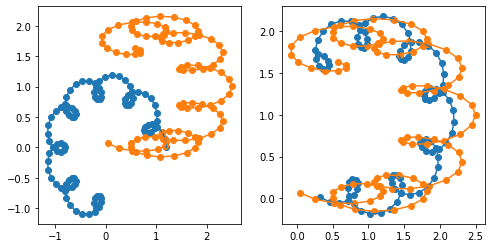

In [41]:
phi = np.linspace(0, 3/2 * np.pi, 100)
x1 = np.cos(phi) + np.cos(10 * phi)/5
y1 = np.sin(phi) + np.sin(10 * phi)/5
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi+1, 5/2 * np.pi+1, 100)
x2 = np.cos(phi) + np.cos(10 * phi)/2 + 1
y2 = np.sin(phi) + np.sin(10 * phi)/6 + 1
M2 = np.vstack([x2, y2]).T

plot_procrust_transform(M1, M2)